In [119]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1 Exploratory Analysis

## 1.1 Data overview

In [120]:
df = pd.read_csv('data\\train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [121]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [123]:
df.shape

(7613, 5)

## 2 Missing values

In [124]:
# check for missing values
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

### 2.1 Keyword

In [125]:
# most frequent value in keyword column
df.keyword.value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [126]:
# impute the missing values in keyword column with fatalities
df.keyword.fillna('fatalities', inplace=True)

In [127]:
df.keyword.value_counts()

keyword
fatalities               106
deluge                    42
armageddon                42
damage                    41
harm                      41
                        ... 
forest%20fire             19
epicentre                 12
threat                    11
inundation                10
radiation%20emergency      9
Name: count, Length: 221, dtype: int64

### 2.2 Location

In [128]:
# most frequent value in location column
df.location.value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [129]:
# impute the missing values in location column with USA
df.location.fillna('USA', inplace=True)

In [130]:
df.location.value_counts()

location
USA                             2637
New York                          71
United States                     50
London                            45
Canada                            29
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: count, Length: 3341, dtype: int64

In [131]:
# display the columns with missing values
df[df.isnull().any(axis=1)]

,id,keyword,location,text,target


## 3 Graphs

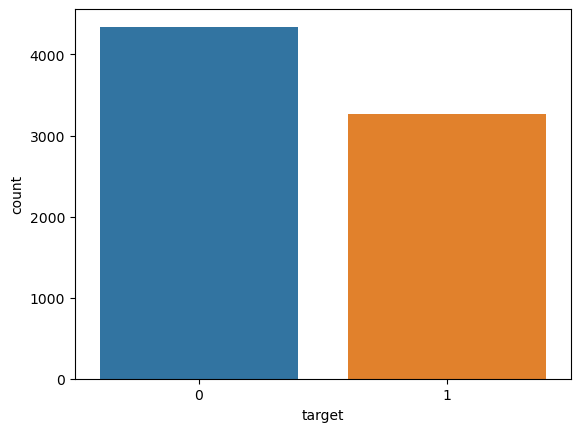

In [132]:
# plot a histogram of target
sns.countplot(x='target', data=df)
plt.show()

In [133]:
# display the number of values in target
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [134]:
# remove all the rows in target column with value 0
df = df[df['target'] == 1] # or df[df['target'] != 0]
df.shape

(3271, 5)

In [135]:
df['target'].value_counts()

target
1    3271
Name: count, dtype: int64

## 4 Preprocessing

In [136]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_stopwords(text):
    STOPWORDS = set(nltk.corpus.stopwords.words('english'))
    text = [x.lower() for x in text.split() if x.lower() not in STOPWORDS]
    return " ".join(text)

## 5 Data splitting

In [137]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

## 6 Model

### 6.1 Creating the model

In [138]:
# create a model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Create a pipeline that first transforms text data into a bag-of-words representation
# and then trains a Multinomial Naive Bayes classifier
text_clf = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
text_clf.fit(x_train, y_train)

# Make predictions
predictions = text_clf.predict(x_test)

### 6.2 Evaluation

In [140]:
# print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       655

    accuracy                           1.00       655
   macro avg       1.00      1.00      1.00       655
weighted avg       1.00      1.00      1.00       655



## 7 Test Data

In [141]:
test = pd.read_csv("data/test.csv")
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [142]:
test.shape

(3263, 4)

### 7.1 Missing values in Test

In [143]:
# display the missing value
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

#### 7.1.1 Keyword

In [144]:
# display the number of values in keyword column
test['keyword'].value_counts()

keyword
deluged               23
demolished            22
rubble                22
first%20responders    21
seismic               21
                      ..
threat                 5
fatalities             5
forest%20fire          5
inundation             4
epicentre              1
Name: count, Length: 221, dtype: int64

In [145]:
# impute the missing values in keyword column with deluged
test.keyword.fillna('deluged', inplace=True)

#### 7.1.2 Location

In [146]:
# display the number of values in location column
test['location'].value_counts()

location
New York                  38
USA                       37
Worldwide                 16
United States             15
London                    13
                          ..
Medford, NJ                1
Quezon City                1
LanÌ¼s                     1
USA,Washington,Seattle     1
Brussels, Belgium          1
Name: count, Length: 1602, dtype: int64

In [147]:
# impute the missing values in location column with New York
test.location.fillna('New York', inplace=True)

In [148]:
# display the columns with missing values in 
test.isnull().sum()

id          0
keyword     0
location    0
text        0
dtype: int64

In [149]:
def remove_punctuation(text):
    import string # import string library
    translator = str.maketrans('', '', string.punctuation) # create a translator
    return text.translate(translator) # translate the text

def remove_stopwords(text):
    STOPWORDS = set(nltk.corpus.stopwords.words('english')) # create a set of stopwords
    text = [x.lower() for x in text.split() if x.lower() not in STOPWORDS]
    return " ".join(text) # join the text

In [150]:
# use the model to predict the target
test['target'] = clf.predict(test['text'])
test.head()

,id,keyword,location,text,target
0,0,deluged,New York,Just happened a terrible car crash,1
1,2,deluged,New York,"Heard about #earthquake is different cities, s...",1
2,3,deluged,New York,"there is a forest fire at spot pond, geese are...",1
3,9,deluged,New York,Apocalypse lighting. #Spokane #wildfires,1
4,11,deluged,New York,Typhoon Soudelor kills 28 in China and Taiwan,1


In [156]:
# create a submission file with only id and target
submission = test[['id', 'target']]
submission.head()

# save the submission file
submission.to_csv('submission.csv', index=False)

In [157]:
submission.head(20)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,1
7,22,1
8,27,1
9,29,1
